## 线性回归代码实现

In [1]:
import numpy as np
import matplotlib.pyplot as plt

##### 定义一个加载数据的函数

In [2]:
def loaddata():
    data = np.loadtxt('data/data1.txt',delimiter=',')
    n = data.shape[1]-1 #特征数
    X = data[:,0:n]
    y = data[:,-1].reshape(-1,1)
    return X,y

##### 特征归一化
归一化有很多种方式，我们这里采取的方式是：对每一个特征，这列中的每个数据分别减去这列的均值，然后再除以这列的方差

In [3]:
def featureNormalize(X):
    mu = np.average(X,axis=0)
    sigma =np.std(X,axis=0,ddof=1)
    X = (X-mu)/sigma
    return X,mu,sigma

##### LASSO回归核心代码
<img src="images/08.png" width="300" align="left"/>
<p>
<img src="images/09.png" width="300" align="left"/>

In [4]:
def lasso_regression(X, y, iterations,lambd=0.2):
    m, n = X.shape
    theta = np.matrix(np.zeros((n, 1)))
    for it in range(iterations):
        for k in range(n):#n个特征
            # 计算常量值z_k和p_k
            z_k = np.sum(X[:, k]**2)
            p_k = 0
            for i in range(m):
                #开始，根据公式计算p_k
                p_k += X[i,k] * (y[i,0]-np.sum(X[i,j]*theta[j,0] for j in range(n) if j!=k))
                #结束
            #w_k是个临时变量，根据p_k的不同取值进行计算
            if p_k < -lambd/2:
                w_k = (p_k + lambd/2) / z_k
            elif p_k > lambd/2:
                w_k = (p_k - lambd/2) / z_k
            else:
                w_k = 0
            theta[k, 0] = w_k
    return theta

D:\anaconda3\envs\keras\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  # This is added back by InteractiveShellApp.init_path()


[[5.83810412]
 [4.61585958]]


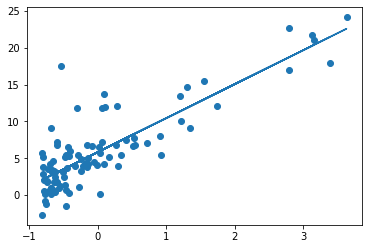

In [5]:
X,y = loaddata()
X,mu,sigma = featureNormalize(X)


X_1 = np.insert(X, 0, values=1, axis=1)
theta = lasso_regression(X_1,y,100)
print(theta)
plt.scatter(X,y)
line = theta[0,0]+theta[1,0]*X
plt.plot(X,line)
plt.show()